# Introduction to numpy for image processing

In image processing we often want to manipulate images through programming. This is best done with high level programming languages such as python or Matlab. This course's assignments will mostly focus on image processing with python. 

Digital images are arrays of pixels in three dimensions *HxWxC*. *C* stands for channel or color channel and the size of that dimension is equal to the number of color channels. Three examples of common color spaces are RGB, HSV and CMYK.

## Introduction

### First look at numpy
Numpy is a python library for matrix manipulation and adds support for a number of high-level mathematical operations. Numpy allows for vectorization of operations which is alot faster than traditional for-loops in python.

To get started with numpy we must import the library. The short-hand np is standarized, and is the recommended way to import numpy.

In [6]:
import numpy as np

We can then declare zero-initialized arrays or declare arrays from existing python lists. There are of course a number of other possible options for initializing our arrays which can be explored in the [docs](https://numpy.org/doc/stable/reference/routines.array-creation.html)

In [2]:
python_list = [[1.  if (i + j) % 2 == 0 else 0. for i in range(8)] for j in range(8)]

np_from_list = np.array(python_list)
print(np_from_list)

#When initializing an array without any data we must provide the dimensions
np_zero = np.zeros((8,8))
print(np_zero)

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Most often we do not want to view the matrices as numbers, we want to visualize them as images. This can be done by utilising another python library which builds on numpy: matplotlib.

In [2]:
from matplotlib import pyplot as plt

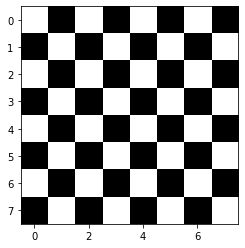

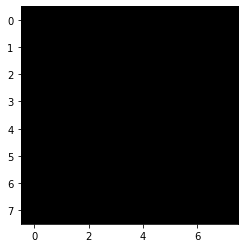

In [4]:
plt.imshow(np_from_list, cmap = "gray")
plt.show()
plt.imshow(np_zero, cmap = "gray")
plt.show()

### Importing images

We now demonstrated how to visualize images, but checkerboards and all black frames are not very interesting. This next step will show how we can utilise matplotlib to read images and import them into numpy arrays.

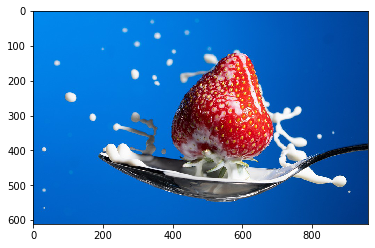

In [8]:
image_path = "images/strawberry.jpg"

im_array = plt.imread(image_path)
plt.imshow(im_array)
plt.show()

Commonly we want to know the dimensions of our image. This can be done like this:

In [6]:
shape = im_array.shape
print(f"Image dimensions: {shape}")

Image dimensions: (611, 960, 3)


From this we see that pyplot imports images in the order *HxWxC*.

### Point processing

Some of the simplest image processing operations are point processing operations. Point processing is normally called intesity transformation and is image operations that operate on each pixel individually without respect to the neighbouring pixels. This is in contrast to neighbourhood processing, which assesses the neighbourhood around each pixel in order to transform it.

A simpel operation is inverting the image. With numpy this can be done easily, as all matematical operations are implicitly done on all elements of the array.

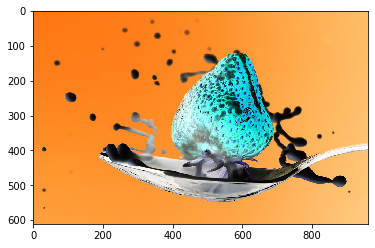

In [7]:
inverted = 255 - im_array
plt.imshow(inverted)
plt.show()

In intensity transforms each pixel is assigned a new color according to a scalar function:
$$c' = f(c)$$

The function f can vary alot depending on what we want to do. The following snippet displays some common mathematical operations that we can apply to images.

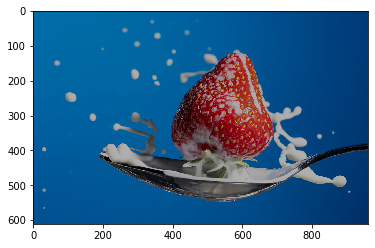

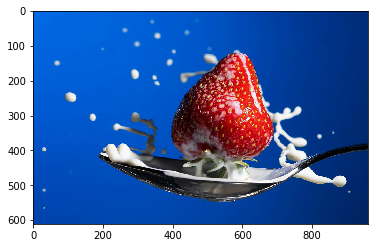

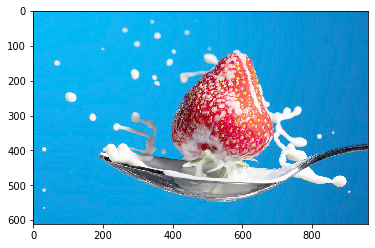

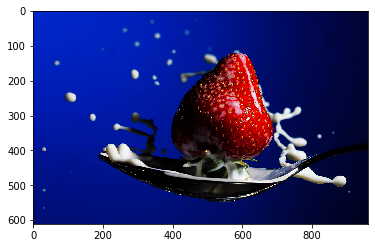

In [8]:
float_im = im_array/255.

log_transform = np.log(1 + float_im)
plt.imshow(log_transform)
plt.show()

exp_transform = (np.exp(float_im) - 1)/(np.e - 1)
plt.imshow(exp_transform)
plt.show()

gamma_transform = np.power(float_im, 0.5)
plt.imshow(gamma_transform)
plt.show()

gamma_transform = np.power(float_im, 3)
plt.imshow(gamma_transform)
plt.show()

### Slicing in numpy

Numpy arrays can be indexed and sliced as normal python lists, but the syntax is a bit different.

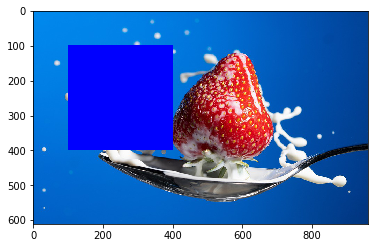

In [9]:
im_copy = im_array.copy()
im_copy[100:400, 100:400, :] = [0, 0, 255]
plt.imshow(im_copy)
plt.show()

### Histogram equalization

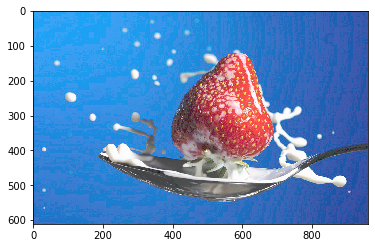

In [19]:
def histogram_eq(image):
    hist, bins = np.histogram(image, 256)
    cumulative_hist = np.zeros(256)
    cumulative_hist[0] = hist[0]
    for i in range(1, 256):
        cumulative_hist[i] = cumulative_hist[i-1] + hist[i]
    cumulative_hist /= cumulative_hist[-1]
    table = (cumulative_hist * 255).astype(np.uint8)
    new_im = np.zeros(image.shape, dtype = np.uint8)
    new_im[:,:,:] = table[image[:,:,:]]
    return new_im
image = histogram_eq(im_array)
plt.imshow(image)
plt.show()

## Tasks

### 1. Array creation
Declare a 255x255x1 black/white image which is all black except for a white circle in the middle. Display the image to screen.

In [10]:
#Write your code here

#### Example solution

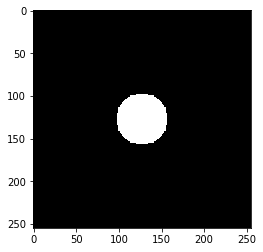

In [11]:
python_list = [[1. if ((i-127)**2 + (j-127)**2 < 900) else 0. for i in range(255)] for j in range(255)]
np_array = np.array(python_list)
plt.imshow(np_array, cmap = "gray")
plt.show()

### 2. Intensity transform

Import the image from the given path. Apply a gamma transform to a rectangular slice of the image.

In [12]:
im_path = "images/eye_closeup.jpg"
#Write your code here.

#### Example solution

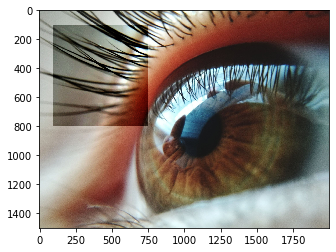

In [13]:
image = plt.imread(im_path)
image = image/255.

image[100:800, 100:750, :] = np.power(image[100:800, 100:750, :], 3)

plt.imshow(image)
plt.show()

### 3. Creative task

Take the original strawberry image from the introduction and see if you can change the background color from blue to something else without affecting the non-background objects too much.

In [14]:
image_path = "images/strawberry.jpg"

image = plt.imread(image_path)

#### Example solution
This could probably be vectorized for performance, but displays the idea nicely.

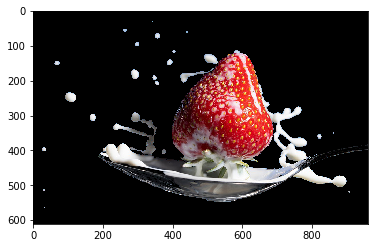

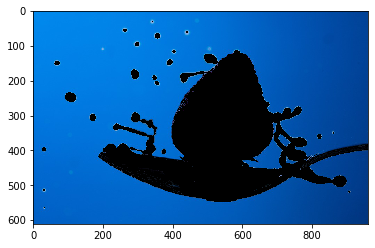

In [15]:
result = np.zeros_like(image)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        result[y,x,:] = image[y,x,:] if np.sqrt(image[y,x,0]**2 + image[y,x,1]**2) > image[y,x,2] else [0,0,0]
plt.imshow(result)
plt.show()

result = np.zeros_like(image)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        result[y,x,:] = image[y,x,:] if np.sqrt(image[y,x,0]**2 + image[y,x,1]**2) < image[y,x,2] else [0,0,0]
plt.imshow(result)
plt.show()